In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as mpl
df = pd.read_csv('yagoFactsCleaned.csv')
df.columns = ['Subject', 'Predicate', 'Object']

In [2]:
def search(queryList):
    df2 = df.loc[df['Subject'].isin(queryList) | df['Object'].isin(queryList)]
    G = nx.from_pandas_edgelist(df2, 'Subject', 'Object', 'Predicate')
    mpl.figure(figsize=(24, 24))
    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos)

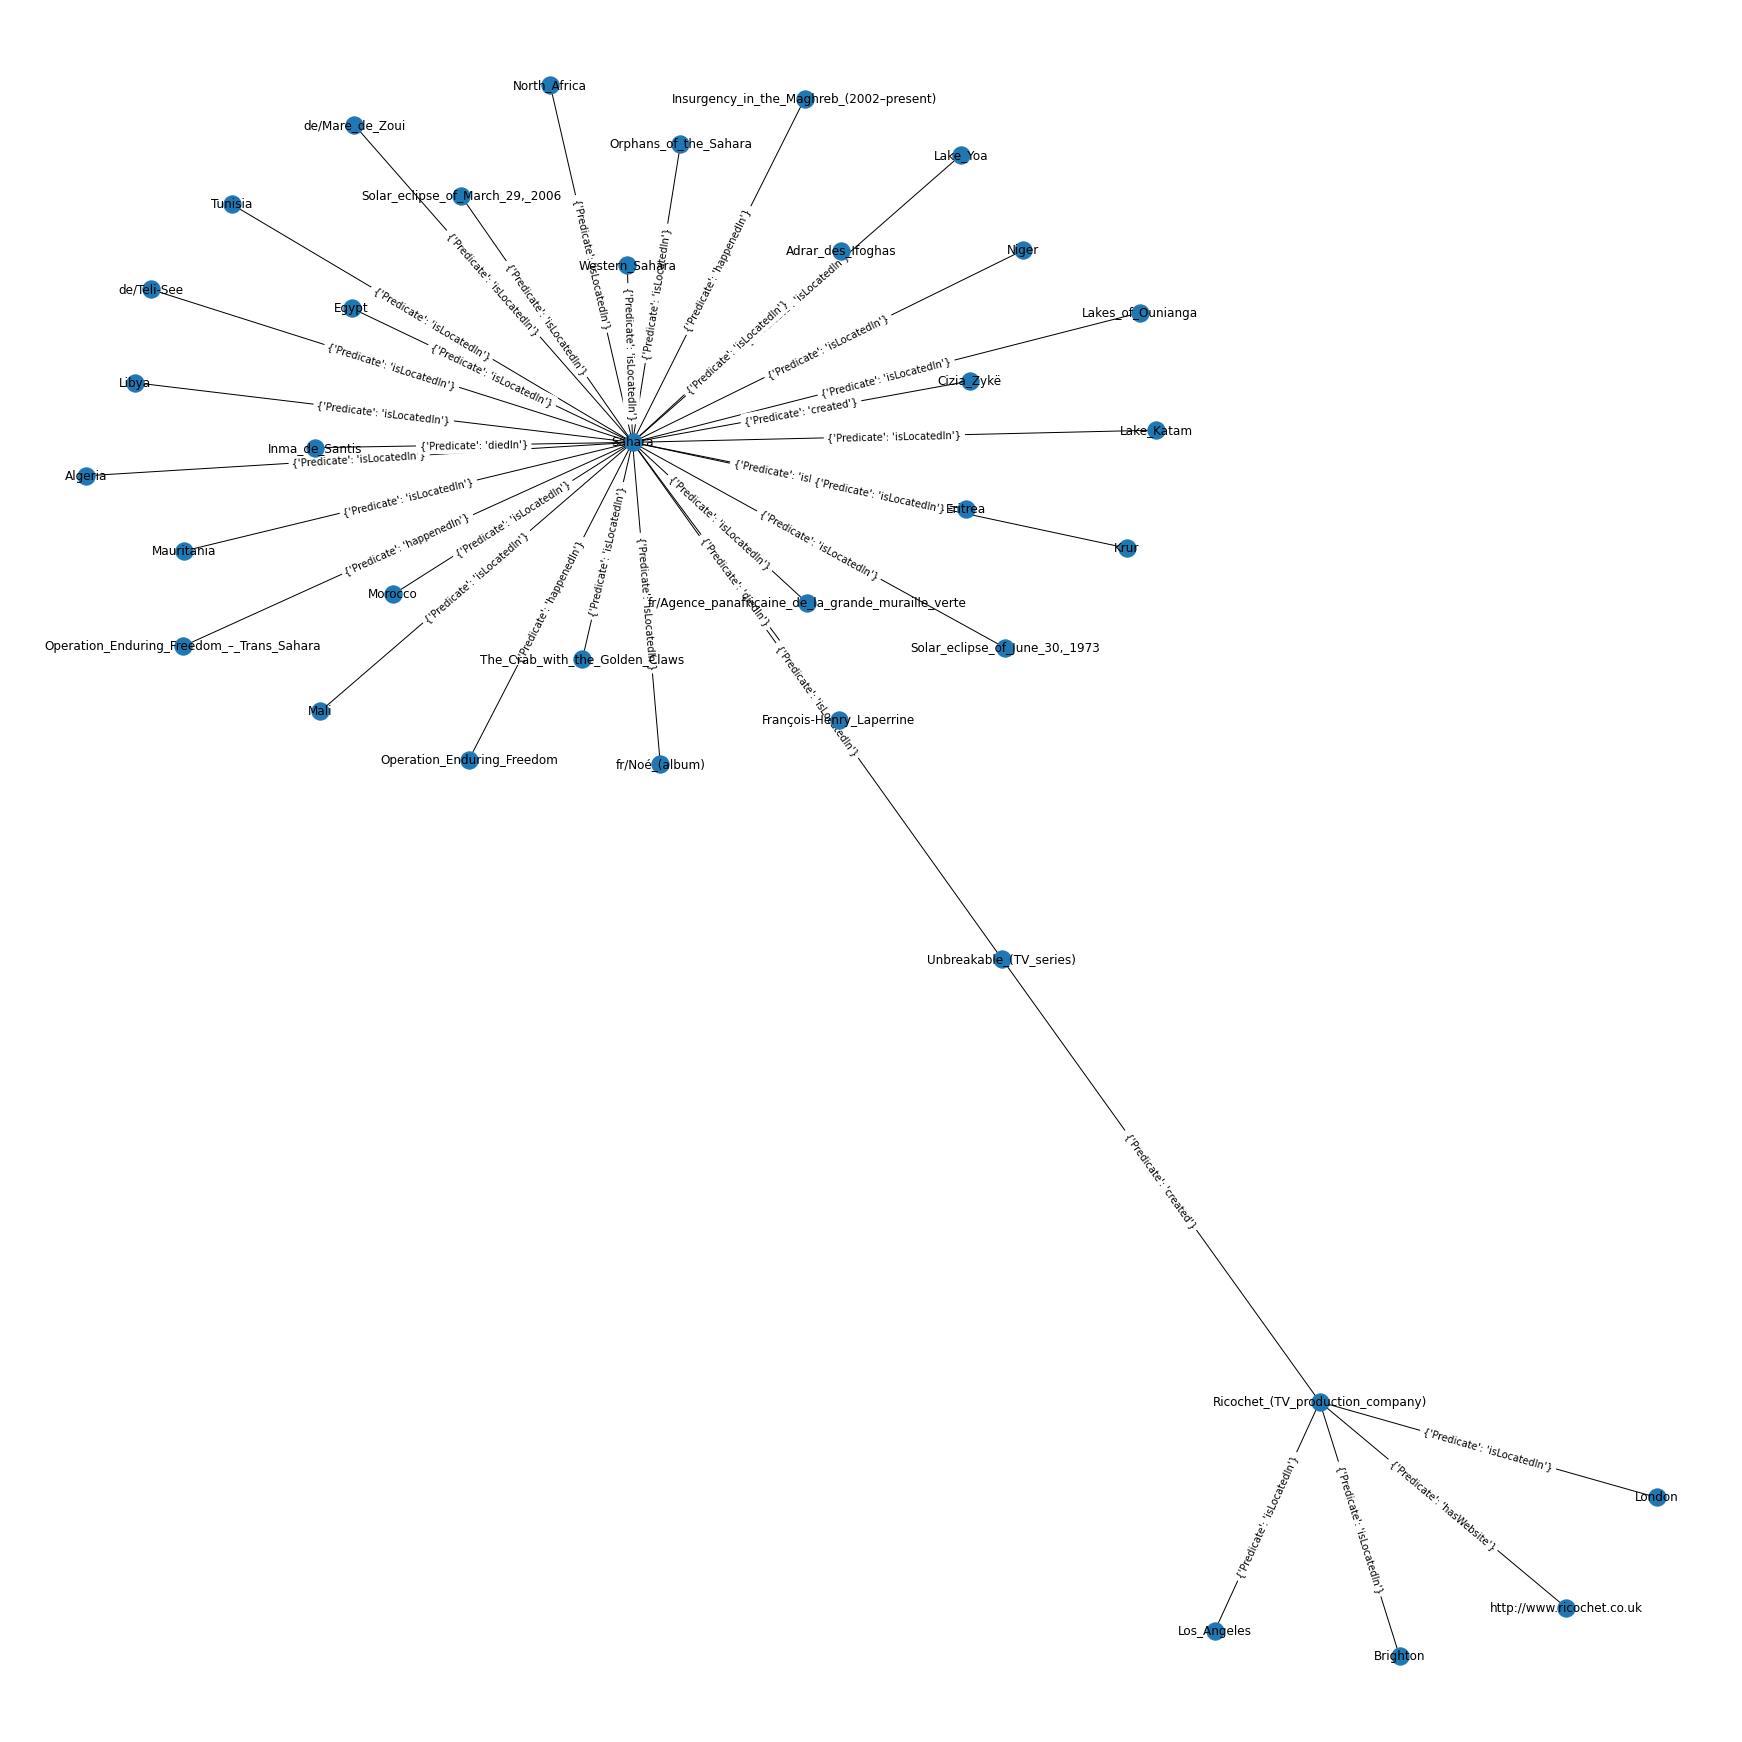

In [3]:
search(['Ricochet_(TV_production_company)', 'Sahara'])

Conclusions about NetworkX:

-Easy to use with pandas

-Slow for converting entire yagofacts dataset to graph, so use as search engine limited

-Built-in drawing function is useful for representing subgraphs of yago dataset

In [4]:
import pyspark
from graphframes import *
spark = pyspark.sql.SparkSession.builder.appName('GraphRepr').getOrCreate()
sparkDf = spark.read.csv('yagoFactsCleaned.csv',header=True)
edgeDf = sparkDf.withColumnRenamed('1','src').withColumnRenamed('2','Predicate').withColumnRenamed('3','dst')
vertexDf = edgeDf.select('src').union(edgeDf.select('dst')).distinct()
vertexDf = vertexDf.withColumnRenamed('src','id')
g = GraphFrame(vertexDf, edgeDf)

In [5]:
def search(queryList):
    """Assumes that the queryList contains only two elements.
    If there is a directed path from the first to the second with length 10 or less, returns path."""
    g.bfs("id = '" + queryList[0] + "'", "id = '" + queryList[1] + "'").show(20, False)

In [6]:
search(['Marian_Shields_Robinson', 'Sahara'])

+-------------------------+-----------------------------------------------------+---------------+--------------------------------------------------------------------------+-------------------------------------------+---------------------------------------------------------------+--------+
|from                     |e0                                                   |v1             |e1                                                                        |v2                                         |e2                                                             |to      |
+-------------------------+-----------------------------------------------------+---------------+--------------------------------------------------------------------------+-------------------------------------------+---------------------------------------------------------------+--------+
|[Marian_Shields_Robinson]|[Marian_Shields_Robinson, isCitizenOf, United_States]|[United_States]|[United_States, participatedIn, O

Conclusions about pyspark graphframes:

-Efficient when converting yagofacts dataframe to graph

-Doesn't have a built-in function to represent the graph visually

-Built-in breadth-first-search function potentially useful for knowledge-graph based search engine